In [1]:
# In the name of God
# Mohammad Hossein Zehtab
# Titanic Exploratory Data Analysis

# Importing Libraries

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Ignoring warnings
import warnings
warnings.filterwarnings(action="ignore")

# Setting Style
plt.style.use("ggplot")

# Loading Dataset

In [2]:
# Loading dataset
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# Titanic Shape
titanic.shape

(891, 15)

In [4]:
# Better understanding of titanic dataframe
titanic["deck"].unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


**Insight:**
* These two columns seem to be equivalent, and need to be checked before being droped:
  - 'pclass' and 'class',
  - 'embarked' and 'embark_town',
  - 'survived' and 'alive'.

# Data Preprocassing

In [6]:
# Making a copy of titanic dataframe
df = titanic.copy()
df.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
780,1,3,female,13.0,0,0,7.2292,C,Third,child,False,NaN,Cherbourg,yes,True
349,0,3,male,42.0,0,0,8.6625,S,Third,man,True,NaN,Southampton,no,True
351,0,1,male,NaN,0,0,35.0000,S,First,man,True,C,Southampton,no,True
752,0,3,male,33.0,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
104,0,3,male,37.0,2,0,7.9250,S,Third,man,True,NaN,Southampton,no,False


In [7]:
# Checking equivalent columns
# 'pclass' and 'class'
numeric_class = df["class"].replace({"First":1, "Second":2, "Third":3})
(df["pclass"] == numeric_class).sum() == df.shape[0]

True

Therefore, 'pclass' and 'class' columns are equivalent. So we drop 'class' column because we need numerical columns.

In [8]:
# Dropping 'class' column
df = df.drop(labels=["class"], axis=1)
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,man,True,NaN,Queenstown,no,True


In [9]:
# Checking equivalent columns
# 'embarked' and 'embark_town'
embarked_fullname = df["embarked"].replace({"S":"Southampton", "C":"Cherbourg", "Q":"Queenstown"})
(df["embark_town"] == embarked_fullname).sum()

889

In [10]:
# Checking equivalent columns
# 'embarked' and 'embark_town'
df["embarked"].info(), df["embark_town"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: embarked
Non-Null Count  Dtype 
--------------  ----- 
889 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB
<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: embark_town
Non-Null Count  Dtype 
--------------  ----- 
889 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


(None, None)

Because both 'embarked' and 'embark_town' columns have 2 NaN values, so they are equivalent. Therefore, we drop 'embarked' column.

In [11]:
# Dropping 'embarked' column
df = df.drop(labels=["embarked"], axis=1)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,man,True,NaN,Southampton,no,True


In [12]:
# Checking equivalent columns
# 'survived' and 'alive'
numeric_alive = (df["alive"] == "yes").astype(int)
(df["survived"] == numeric_alive).sum() == df.shape[0]

True

Therefore, 'survived' and 'alive' columns are equivalent, but we keep both of them to have a numerical and categorical target. Also, we change the values of 'alive' column to 'alive' or 'dead'.

In [13]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,man,True,NaN,Southampton,no,True


In [14]:
# Replacing 'alive' data values
df = df.replace({"yes":"Alive", "no":"Dead"})

In [15]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,man,True,NaN,Southampton,Dead,True
887,1,1,female,19.0,0,0,30.00,woman,False,B,Southampton,Alive,True
888,0,3,female,NaN,1,2,23.45,woman,False,NaN,Southampton,Dead,False
889,1,1,male,26.0,0,0,30.00,man,True,C,Cherbourg,Alive,True
890,0,3,male,32.0,0,0,7.75,man,True,NaN,Queenstown,Dead,True


In [16]:
# Renaming 'alive' column name
df = df.rename({"alive":"living_status"}, axis=1)
df.sample()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,deck,embark_town,living_status,alone
497,0,3,male,NaN,0,0,15.1,man,True,NaN,Southampton,Dead,True


In [17]:
df.shape

(891, 13)

# Encoding Categorical Data

In [18]:
df.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,deck,embark_town,living_status,alone
1,1,1,female,38.0,1,0,71.2833,woman,False,C,Cherbourg,Alive,False
690,1,1,male,31.0,1,0,57.0000,man,True,B,Southampton,Alive,False
473,1,2,female,23.0,0,0,13.7917,woman,False,D,Cherbourg,Alive,True
700,1,1,female,18.0,1,0,227.5250,woman,False,C,Cherbourg,Alive,False
263,0,1,male,40.0,0,0,0.0000,man,True,B,Southampton,Dead,True


In [19]:
# Binary encoding for 'sex' feature
df = df.assign(sex_binary = (df["sex"] == "female").astype(int))

In [20]:
df.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,deck,embark_town,living_status,alone,sex_binary
311,1,1,female,18.0,2,2,262.375,woman,False,B,Cherbourg,Alive,False,1
576,1,2,female,34.0,0,0,13.000,woman,False,NaN,Southampton,Alive,True,1
619,0,2,male,26.0,0,0,10.500,man,True,NaN,Southampton,Dead,True,0
186,1,3,female,NaN,1,0,15.500,woman,False,NaN,Queenstown,Alive,False,1
595,0,3,male,36.0,1,1,24.150,man,True,NaN,Southampton,Dead,False,0


In [21]:
# Label encoding for 'who' feature
df = df.assign(who_label = pd.factorize(df["who"])[0])

In [22]:
df.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,deck,embark_town,living_status,alone,sex_binary,who_label
110,0,1,male,47.0,0,0,52.0000,man,True,C,Southampton,Dead,True,0,0
84,1,2,female,17.0,0,0,10.5000,woman,False,NaN,Southampton,Alive,True,1,1
201,0,3,male,NaN,8,2,69.5500,man,True,NaN,Southampton,Dead,False,0,0
710,1,1,female,24.0,0,0,49.5042,woman,False,C,Cherbourg,Alive,True,1,1
696,0,3,male,44.0,0,0,8.0500,man,True,NaN,Southampton,Dead,True,0,0


In [23]:
# Target encoding for 'adult_male' feature
df = df.assign(adult_male_numeric = round(df.groupby(by="adult_male")["survived"].transform("mean"), 2))

In [24]:
df.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,deck,embark_town,living_status,alone,sex_binary,who_label,adult_male_numeric
577,1,1,female,39.0,1,0,55.9000,woman,False,E,Southampton,Alive,False,1,1,0.72
842,1,1,female,30.0,0,0,31.0000,woman,False,NaN,Cherbourg,Alive,True,1,1,0.72
18,0,3,female,31.0,1,0,18.0000,woman,False,NaN,Southampton,Dead,False,1,1,0.72
100,0,3,female,28.0,0,0,7.8958,woman,False,NaN,Southampton,Dead,True,1,1,0.72
720,1,2,female,6.0,0,1,33.0000,child,False,NaN,Southampton,Alive,False,1,2,0.72


In [25]:
# Ordinal encoding for 'deck' feature
temp_order = {"A":1, "B":2, "C":3, "D":4, "E":5, "F":6, "G":7}
df = df.assign(deck_ordinal = df["deck"].map(temp_order))

In [26]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,deck,embark_town,living_status,alone,sex_binary,who_label,adult_male_numeric,deck_ordinal
0,0,3,male,22.0,1,0,7.2500,man,True,NaN,Southampton,Dead,False,0,0,0.16,NaN
1,1,1,female,38.0,1,0,71.2833,woman,False,C,Cherbourg,Alive,False,1,1,0.72,3
2,1,3,female,26.0,0,0,7.9250,woman,False,NaN,Southampton,Alive,True,1,1,0.72,NaN
3,1,1,female,35.0,1,0,53.1000,woman,False,C,Southampton,Alive,False,1,1,0.72,3
4,0,3,male,35.0,0,0,8.0500,man,True,NaN,Southampton,Dead,True,0,0,0.16,NaN


In [27]:
# Label encoding for 'embark_town' feature ({'Southampton':0, 'Cherbourg':1, 'Queenstown':2})
embarked_dict= {'Southampton':0, 'Cherbourg':1, 'Queenstown':2}
df = df.assign(embark_town_label =df["embark_town"].map(embarked_dict))

In [28]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,deck,embark_town,living_status,alone,sex_binary,who_label,adult_male_numeric,deck_ordinal,embark_town_label
886,0,2,male,27.0,0,0,13.00,man,True,NaN,Southampton,Dead,True,0,0,0.16,NaN,0.0
887,1,1,female,19.0,0,0,30.00,woman,False,B,Southampton,Alive,True,1,1,0.72,2,0.0
888,0,3,female,NaN,1,2,23.45,woman,False,NaN,Southampton,Dead,False,1,1,0.72,NaN,0.0
889,1,1,male,26.0,0,0,30.00,man,True,C,Cherbourg,Alive,True,0,0,0.16,3,1.0
890,0,3,male,32.0,0,0,7.75,man,True,NaN,Queenstown,Dead,True,0,0,0.16,NaN,2.0


In [29]:
# Binary encoding for 'alone' feature
df = df.assign(alone_binary = (df["alone"] == True).astype(int))

In [30]:
df.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,deck,embark_town,living_status,alone,sex_binary,who_label,adult_male_numeric,deck_ordinal,embark_town_label,alone_binary
201,0,3,male,NaN,8,2,69.550,man,True,NaN,Southampton,Dead,False,0,0,0.16,NaN,0.0,0
232,0,2,male,59.0,0,0,13.500,man,True,NaN,Southampton,Dead,True,0,0,0.16,NaN,0.0,1
480,0,3,male,9.0,5,2,46.900,child,False,NaN,Southampton,Dead,False,0,2,0.72,NaN,0.0,0
383,1,1,female,35.0,1,0,52.000,woman,False,NaN,Southampton,Alive,False,1,1,0.72,NaN,0.0,0
292,0,2,male,36.0,0,0,12.875,man,True,D,Cherbourg,Dead,True,0,0,0.16,4,1.0,1


In [31]:
# Column reindexing
features = ["pclass", "sex_binary", "age", "sibsp", "parch", "fare", "who_label", "adult_male_numeric",
           "deck_ordinal", "embark_town_label", "alone_binary"]
numerical_target = ["survived"]
categorical_target = ["living_status"]
df_encoded = df.reindex(columns = features + numerical_target + categorical_target)

In [32]:
df_encoded.sample(10)

,pclass,sex_binary,age,sibsp,parch,fare,who_label,adult_male_numeric,deck_ordinal,embark_town_label,alone_binary,survived,living_status
542,3,1,11.00,4,2,31.2750,2,0.72,NaN,0.0,0,0,Dead
604,1,0,35.00,0,0,26.5500,0,0.16,NaN,1.0,1,1,Alive
799,3,1,30.00,1,1,24.1500,1,0.72,NaN,0.0,0,0,Dead
54,1,0,65.00,0,1,61.9792,0,0.16,2,1.0,0,0,Dead
72,2,0,21.00,0,0,73.5000,0,0.16,NaN,0.0,1,0,Dead
444,3,0,NaN,0,0,8.1125,0,0.16,NaN,0.0,1,1,Alive
61,1,1,38.00,0,0,80.0000,1,0.72,2,NaN,1,1,Alive
363,3,0,35.00,0,0,7.0500,0,0.16,NaN,0.0,1,0,Dead
469,3,1,0.75,2,1,19.2583,2,0.72,NaN,1.0,0,1,Alive
462,1,0,47.00,0,0,38.5000,0,0.16,5,0.0,1,0,Dead


In [33]:
# Verifying results for each living status
# Alive
df_Alive = df_encoded.query(expr = "living_status == 'Alive'")
df_Alive.sample(5)

,pclass,sex_binary,age,sibsp,parch,fare,who_label,adult_male_numeric,deck_ordinal,embark_town_label,alone_binary,survived,living_status
712,1,0,48.0,1,0,52.0000,0,0.16,3,0.0,0,1,Alive
516,2,1,34.0,0,0,10.5000,1,0.72,6,0.0,1,1,Alive
427,2,1,19.0,0,0,26.0000,1,0.72,NaN,0.0,1,1,Alive
28,3,1,NaN,0,0,7.8792,1,0.72,NaN,2.0,1,1,Alive
298,1,0,NaN,0,0,30.5000,0,0.16,3,0.0,1,1,Alive


In [34]:
# Verifying results for each living status
# Dead
df_Dead = df_encoded.query(expr = "living_status == 'Dead'")
df_Dead.sample(5)

,pclass,sex_binary,age,sibsp,parch,fare,who_label,adult_male_numeric,deck_ordinal,embark_town_label,alone_binary,survived,living_status
795,2,0,39.0,0,0,13.0000,0,0.16,NaN,0.0,1,0,Dead
103,3,0,33.0,0,0,8.6542,0,0.16,NaN,0.0,1,0,Dead
238,2,0,19.0,0,0,10.5000,0,0.16,NaN,0.0,1,0,Dead
260,3,0,NaN,0,0,7.7500,0,0.16,NaN,2.0,1,0,Dead
199,2,1,24.0,0,0,13.0000,1,0.72,NaN,0.0,1,0,Dead


In [35]:
# Dimensions for each living status
print("Alive dataframe dimension is: ", df_Alive.shape)
print("Dead dataframe dimension is: ", df_Dead.shape)

Alive dataframe dimension is:  (342, 13)
Dead dataframe dimension is:  (549, 13)


# Data Processing

In [36]:
# Getting information of data
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   pclass              891 non-null    int64   
 1   sex_binary          891 non-null    int32   
 2   age                 714 non-null    float64 
 3   sibsp               891 non-null    int64   
 4   parch               891 non-null    int64   
 5   fare                891 non-null    float64 
 6   who_label           891 non-null    int64   
 7   adult_male_numeric  891 non-null    float64 
 8   deck_ordinal        203 non-null    category
 9   embark_town_label   889 non-null    float64 
 10  alone_binary        891 non-null    int32   
 11  survived            891 non-null    int64   
 12  living_status       891 non-null    object  
dtypes: category(1), float64(4), int32(2), int64(5), object(1)
memory usage: 77.9+ KB


**Insight:**
* There are 891 records in this dataframe.
* There are 11 numerical features, 1 numerical target and 1 categorical target column.
* Except 'deck_ordinal' feature, which is in type of 'category', all other features are in the type of 'int32' or 'float64'.
* After filling missing values, the type of 'deck_ordinal' feature should be changed into integer.
* There are missing values in following features:
  - 'age',
  - deck_ordinal,
  - embark_town_label.

## Handling missing values

In [37]:
# Which columns has missing value
df_encoded.isnull().any()

pclass                False
sex_binary            False
age                    True
sibsp                 False
parch                 False
fare                  False
who_label             False
adult_male_numeric    False
deck_ordinal           True
embark_town_label      True
alone_binary          False
survived              False
living_status         False
dtype: bool

In [38]:
# Which rows has missing value
mask = df_encoded.isnull().any(axis=1)
df_encoded.query(expr="@mask == True")

,pclass,sex_binary,age,sibsp,parch,fare,who_label,adult_male_numeric,deck_ordinal,embark_town_label,alone_binary,survived,living_status
0,3,0,22.0,1,0,7.2500,0,0.16,NaN,0.0,0,0,Dead
2,3,1,26.0,0,0,7.9250,1,0.72,NaN,0.0,1,1,Alive
4,3,0,35.0,0,0,8.0500,0,0.16,NaN,0.0,1,0,Dead
5,3,0,NaN,0,0,8.4583,0,0.16,NaN,2.0,1,0,Dead
7,3,0,2.0,3,1,21.0750,2,0.72,NaN,0.0,0,0,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,3,0,25.0,0,0,7.0500,0,0.16,NaN,0.0,1,0,Dead
885,3,1,39.0,0,5,29.1250,1,0.72,NaN,2.0,0,0,Dead
886,2,0,27.0,0,0,13.0000,0,0.16,NaN,0.0,1,0,Dead
888,3,1,NaN,1,2,23.4500,1,0.72,NaN,0.0,0,0,Dead


In [39]:
# Filling missing values with a chosen strategy for below features
df_sans_missing_value = df_encoded.copy()

In [40]:
# Filling missing values with a chosen strategy for below features
# 'age'
mean__age = df_sans_missing_value["age"].mean()
df_sans_missing_value["age"].fillna(value=round(mean__age, 1), inplace=True)
df_sans_missing_value.tail()

,pclass,sex_binary,age,sibsp,parch,fare,who_label,adult_male_numeric,deck_ordinal,embark_town_label,alone_binary,survived,living_status
886,2,0,27.0,0,0,13.00,0,0.16,NaN,0.0,1,0,Dead
887,1,1,19.0,0,0,30.00,1,0.72,2,0.0,1,1,Alive
888,3,1,29.7,1,2,23.45,1,0.72,NaN,0.0,0,0,Dead
889,1,0,26.0,0,0,30.00,0,0.16,3,1.0,1,1,Alive
890,3,0,32.0,0,0,7.75,0,0.16,NaN,2.0,1,0,Dead


In [41]:
# Filling missing values with a chosen strategy for below features
# 'deck_ordinal'
mode_deck_ordinal = df_sans_missing_value["deck_ordinal"].mode()
df_sans_missing_value["deck_ordinal"].fillna(value=mode_deck_ordinal.iloc[0], inplace=True)
df_sans_missing_value.head()

,pclass,sex_binary,age,sibsp,parch,fare,who_label,adult_male_numeric,deck_ordinal,embark_town_label,alone_binary,survived,living_status
0,3,0,22.0,1,0,7.2500,0,0.16,3,0.0,0,0,Dead
1,1,1,38.0,1,0,71.2833,1,0.72,3,1.0,0,1,Alive
2,3,1,26.0,0,0,7.9250,1,0.72,3,0.0,1,1,Alive
3,1,1,35.0,1,0,53.1000,1,0.72,3,0.0,0,1,Alive
4,3,0,35.0,0,0,8.0500,0,0.16,3,0.0,1,0,Dead


In [42]:
# Filling missing values with a chosen strategy for below features
# 'embark_town_label'
median_embark_town_label = df_sans_missing_value["embark_town_label"].median()
df_sans_missing_value["embark_town_label"].fillna(value=median_embark_town_label, inplace=True)
df_sans_missing_value.sample(5)

,pclass,sex_binary,age,sibsp,parch,fare,who_label,adult_male_numeric,deck_ordinal,embark_town_label,alone_binary,survived,living_status
637,2,0,31.0,1,1,26.2500,0,0.16,3,0.0,0,0,Dead
374,3,1,3.0,3,1,21.0750,2,0.72,3,0.0,0,0,Dead
292,2,0,36.0,0,0,12.8750,0,0.16,4,1.0,1,0,Dead
779,1,1,43.0,0,1,211.3375,1,0.72,2,0.0,0,1,Alive
622,3,0,20.0,1,1,15.7417,0,0.16,3,1.0,0,1,Alive


In [43]:
# Checking if there is any more missing values
mask = df_sans_missing_value.isnull().any(axis=1)
df_sans_missing_value.query(expr="@mask == True")

,pclass,sex_binary,age,sibsp,parch,fare,who_label,adult_male_numeric,deck_ordinal,embark_town_label,alone_binary,survived,living_status


In [44]:
# Checking if there is any more missing values
df_sans_missing_value.isnull().any()

pclass                False
sex_binary            False
age                   False
sibsp                 False
parch                 False
fare                  False
who_label             False
adult_male_numeric    False
deck_ordinal          False
embark_town_label     False
alone_binary          False
survived              False
living_status         False
dtype: bool

## Handling duplicates

In [45]:
# Is there any duplicated rows?
df_sans_missing_value.duplicated().any()

True

In [46]:
# Number of duplicated rows
df_sans_missing_value.duplicated().sum()

108

In [47]:
# Identifying duplicated rows
maskd = df_sans_missing_value.duplicated()
duplicated_rows = df_sans_missing_value.query(expr="@maskd == True")
duplicated_rows

,pclass,sex_binary,age,sibsp,parch,fare,who_label,adult_male_numeric,deck_ordinal,embark_town_label,alone_binary,survived,living_status
47,3,1,29.7,0,0,7.7500,1,0.72,3,2.0,1,1,Alive
76,3,0,29.7,0,0,7.8958,0,0.16,3,0.0,1,0,Dead
77,3,0,29.7,0,0,8.0500,0,0.16,3,0.0,1,0,Dead
87,3,0,29.7,0,0,8.0500,0,0.16,3,0.0,1,0,Dead
95,3,0,29.7,0,0,8.0500,0,0.16,3,0.0,1,0,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,3,0,26.0,0,0,7.8958,0,0.16,3,0.0,1,0,Dead
877,3,0,19.0,0,0,7.8958,0,0.16,3,0.0,1,0,Dead
878,3,0,29.7,0,0,7.8958,0,0.16,3,0.0,1,0,Dead
884,3,0,25.0,0,0,7.0500,0,0.16,3,0.0,1,0,Dead


In [48]:
# Validating duplicated rows
df_sans_missing_value.query(expr="fare == 8.0500 and age == 29.7")

,pclass,sex_binary,age,sibsp,parch,fare,who_label,adult_male_numeric,deck_ordinal,embark_town_label,alone_binary,survived,living_status
45,3,0,29.7,0,0,8.05,0,0.16,3,0.0,1,0,Dead
77,3,0,29.7,0,0,8.05,0,0.16,3,0.0,1,0,Dead
87,3,0,29.7,0,0,8.05,0,0.16,3,0.0,1,0,Dead
95,3,0,29.7,0,0,8.05,0,0.16,3,0.0,1,0,Dead
121,3,0,29.7,0,0,8.05,0,0.16,3,0.0,1,0,Dead
304,3,0,29.7,0,0,8.05,0,0.16,3,0.0,1,0,Dead
415,3,1,29.7,0,0,8.05,1,0.72,3,0.0,1,0,Dead
454,3,0,29.7,0,0,8.05,0,0.16,3,0.0,1,0,Dead
464,3,0,29.7,0,0,8.05,0,0.16,3,0.0,1,0,Dead
511,3,0,29.7,0,0,8.05,0,0.16,3,0.0,1,0,Dead


In [49]:
# Dropping duplicated rows
df_sans_duplicates = df_sans_missing_value.drop_duplicates()
df_sans_duplicates.head()

,pclass,sex_binary,age,sibsp,parch,fare,who_label,adult_male_numeric,deck_ordinal,embark_town_label,alone_binary,survived,living_status
0,3,0,22.0,1,0,7.2500,0,0.16,3,0.0,0,0,Dead
1,1,1,38.0,1,0,71.2833,1,0.72,3,1.0,0,1,Alive
2,3,1,26.0,0,0,7.9250,1,0.72,3,0.0,1,1,Alive
3,1,1,35.0,1,0,53.1000,1,0.72,3,0.0,0,1,Alive
4,3,0,35.0,0,0,8.0500,0,0.16,3,0.0,1,0,Dead


In [50]:
df_sans_duplicates.shape

(783, 13)

In [51]:
# Checking if duplicated rows are droped
df_sans_missing_value.shape[0] == df_sans_duplicates.shape[0] + duplicated_rows.shape[0]

True

# Data Analysis through Data Visualization and Descriptive Statistics

## Measures of center 

In [52]:
# Getting numerical features' dataframe
df_numeric_features = df_sans_duplicates.iloc[:, :-2]
df_numeric_features.tail()

,pclass,sex_binary,age,sibsp,parch,fare,who_label,adult_male_numeric,deck_ordinal,embark_town_label,alone_binary
885,3,1,39.0,0,5,29.125,1,0.72,3,2.0,0
887,1,1,19.0,0,0,30.000,1,0.72,2,0.0,1
888,3,1,29.7,1,2,23.450,1,0.72,3,0.0,0
889,1,0,26.0,0,0,30.000,0,0.16,3,1.0,1
890,3,0,32.0,0,0,7.750,0,0.16,3,2.0,1


In [53]:
df_numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783 entries, 0 to 890
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   pclass              783 non-null    int64   
 1   sex_binary          783 non-null    int32   
 2   age                 783 non-null    float64 
 3   sibsp               783 non-null    int64   
 4   parch               783 non-null    int64   
 5   fare                783 non-null    float64 
 6   who_label           783 non-null    int64   
 7   adult_male_numeric  783 non-null    float64 
 8   deck_ordinal        783 non-null    category
 9   embark_town_label   783 non-null    float64 
 10  alone_binary        783 non-null    int32   
dtypes: category(1), float64(4), int32(2), int64(4)
memory usage: 62.3 KB


To calculate statistic values we need to change 'deck_ordinal' type from category to integer

In [123]:
# Changing type of 'deck_ordinal' from category to integer for df_numeric_features
df_numeric_features["deck_ordinal"] = df_numeric_features["deck_ordinal"].astype(int)
df_numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783 entries, 0 to 890
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pclass              783 non-null    int64  
 1   sex_binary          783 non-null    int32  
 2   age                 783 non-null    float64
 3   sibsp               783 non-null    int64  
 4   parch               783 non-null    int64  
 5   fare                783 non-null    float64
 6   who_label           783 non-null    int64  
 7   adult_male_numeric  783 non-null    float64
 8   deck_ordinal        783 non-null    int32  
 9   embark_town_label   783 non-null    float64
 10  alone_binary        783 non-null    int32  
dtypes: float64(4), int32(3), int64(4)
memory usage: 80.4 KB


In [55]:
# Mean of numerical columns
df_numeric_features.mean()

pclass                 2.245211
sex_binary             0.374202
age                   29.805390
sibsp                  0.523627
parch                  0.416347
fare                  34.722163
who_label              0.530013
adult_male_numeric     0.398161
deck_ordinal           3.097063
embark_town_label      0.348659
alone_binary           0.568327
dtype: float64

In [56]:
# Median of numerical columns
df_numeric_features.median()

pclass                 3.00
sex_binary             0.00
age                   29.70
sibsp                  0.00
parch                  0.00
fare                  15.90
who_label              0.00
adult_male_numeric     0.16
deck_ordinal           3.00
embark_town_label      0.00
alone_binary           1.00
dtype: float64

In [58]:
# Mode of numerical columns
df_numeric_features.mode()

,pclass,sex_binary,age,sibsp,parch,fare,who_label,adult_male_numeric,deck_ordinal,embark_town_label,alone_binary
0,3,0,29.7,0,0,13.0,0,0.16,3,0.0,1


In [59]:
# More details for mode of numerical columns
for feature in df_sans_duplicates:
    print(f"The most frequent value(s) for '{feature}' is: {df_sans_duplicates[feature].mode()}\n")
    print("=" * 50)

The most frequent value(s) for 'pclass' is: 0    3
Name: pclass, dtype: int64

The most frequent value(s) for 'sex_binary' is: 0    0
Name: sex_binary, dtype: int32

The most frequent value(s) for 'age' is: 0    29.7
Name: age, dtype: float64

The most frequent value(s) for 'sibsp' is: 0    0
Name: sibsp, dtype: int64

The most frequent value(s) for 'parch' is: 0    0
Name: parch, dtype: int64

The most frequent value(s) for 'fare' is: 0    13.0
Name: fare, dtype: float64

The most frequent value(s) for 'who_label' is: 0    0
Name: who_label, dtype: int64

The most frequent value(s) for 'adult_male_numeric' is: 0    0.16
Name: adult_male_numeric, dtype: float64

The most frequent value(s) for 'deck_ordinal' is: 0    3
Name: deck_ordinal, dtype: category
Categories (7, int64): [1, 2, 3, 4, 5, 6, 7]

The most frequent value(s) for 'embark_town_label' is: 0    0.0
Name: embark_town_label, dtype: float64

The most frequent value(s) for 'alone_binary' is: 0    1
Name: alone_binary, dtype: i

**Insight:**
- The following features seem to have positive skewness (mean > median):
  * sex_binary
  * age
  * sibsp
  * parch
  * fare
  * who_label
  * adult_male_numeric
  * deck_ordinal
  * embark_town_label
- The following features seem to have negative skewness (mean < median):
  * pclass
  * alone_binary

## Measures of spread

In [60]:
# Getting the range of values for each column
for feature in df_numeric_features:
    min = df_numeric_features[feature].min()
    max = df_numeric_features[feature].max()
    print(f"The minimum value for '{feature}' is: {min}")
    print(f"The maximum value for '{feature}' is: {max}")
    print(f"The range of values for '{feature}' is: {max - min}\n")
    print("=" * 55)
    

The minimum value for 'pclass' is: 1
The maximum value for 'pclass' is: 3
The range of values for 'pclass' is: 2

The minimum value for 'sex_binary' is: 0
The maximum value for 'sex_binary' is: 1
The range of values for 'sex_binary' is: 1

The minimum value for 'age' is: 0.42
The maximum value for 'age' is: 80.0
The range of values for 'age' is: 79.58

The minimum value for 'sibsp' is: 0
The maximum value for 'sibsp' is: 8
The range of values for 'sibsp' is: 8

The minimum value for 'parch' is: 0
The maximum value for 'parch' is: 6
The range of values for 'parch' is: 6

The minimum value for 'fare' is: 0.0
The maximum value for 'fare' is: 512.3292
The range of values for 'fare' is: 512.3292

The minimum value for 'who_label' is: 0
The maximum value for 'who_label' is: 2
The range of values for 'who_label' is: 2

The minimum value for 'adult_male_numeric' is: 0.16
The maximum value for 'adult_male_numeric' is: 0.72
The range of values for 'adult_male_numeric' is: 0.5599999999999999

The

**Insight:**
- 'fare' values have the highest range of 512.3292.
- After that, 'age' values have the highest range of 79.58

In [61]:
# Getting variance, standard deviation, mean and coefficient of variation for each column
for feature in df_numeric_features:
    variance = round(df_numeric_features[feature].var(), 2)
    sigma = round(df_numeric_features[feature].std(), 2)
    mu = round(df_numeric_features[feature].mean(), 2)
    cv = round((sigma / mu), 2)
    print(f"Variance of data for '{feature}' is: {variance}")
    print(f"Standard deviation of data for '{feature}' is: {sigma}")
    print(f"Average of data for '{feature}' is: {mu}")
    print(f"Coefficient of variation of data for '{feature}' is: {cv}\n")
    print("=" * 70)

Variance of data for 'pclass' is: 0.73
Standard deviation of data for 'pclass' is: 0.85
Average of data for 'pclass' is: 2.25
Coefficient of variation of data for 'pclass' is: 0.38

Variance of data for 'sex_binary' is: 0.23
Standard deviation of data for 'sex_binary' is: 0.48
Average of data for 'sex_binary' is: 0.37
Coefficient of variation of data for 'sex_binary' is: 1.3

Variance of data for 'age' is: 187.26
Standard deviation of data for 'age' is: 13.68
Average of data for 'age' is: 29.81
Coefficient of variation of data for 'age' is: 0.46

Variance of data for 'sibsp' is: 0.97
Standard deviation of data for 'sibsp' is: 0.99
Average of data for 'sibsp' is: 0.52
Coefficient of variation of data for 'sibsp' is: 1.9

Variance of data for 'parch' is: 0.7
Standard deviation of data for 'parch' is: 0.84
Average of data for 'parch' is: 0.42
Coefficient of variation of data for 'parch' is: 2.0

Variance of data for 'fare' is: 2724.08
Standard deviation of data for 'fare' is: 52.19
Averag

**Insight:**
- The dispersion of data around the mean for the following features is more than 100%:
  * 'sex_binary' which is 130%
  * 'sibsp' which is 190%
  * 'parch' which is 200%
  * 'fare' which is 150%
  * 'who_label' which is 128%
  * 'embark_town_label' which is 177%

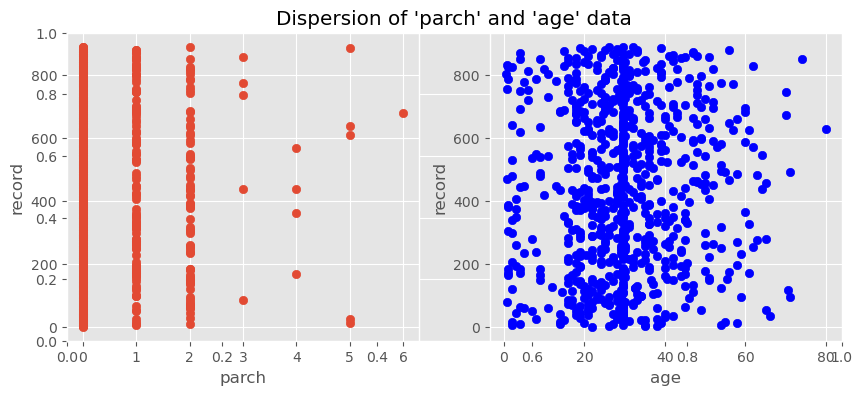

In [62]:
# For more understanding of cv values
plt.figure(figsize=[10, 4])
plt.title("Dispersion of 'parch' and 'age' data")

plt.subplot(121)
plt.scatter(x = df_numeric_features["parch"],
            y = df_numeric_features.index
           )
plt.xlabel("parch")
plt.ylabel("record")

plt.subplot(122)
plt.scatter(x = df_numeric_features["age"],
            y = df_numeric_features.index,
            c = 'blue'
           )
plt.xlabel("age")
plt.ylabel("record")
plt.show()

## Describe Dataframe

In [63]:
# Describe dataframe
(df_sans_duplicates
 .describe()
 .style
 .set_caption("Statistics summary of the dataframe")
 .format(precision=2)
)

,pclass,sex_binary,age,sibsp,parch,fare,who_label,adult_male_numeric,embark_town_label,alone_binary,survived
count,783.00,783.00,783.00,783.00,783.00,783.00,783.00,783.00,783.00,783.00,783.00
mean,2.25,0.37,29.81,0.52,0.42,34.72,0.53,0.40,0.35,0.57,0.41
std,0.85,0.48,13.68,0.99,0.84,52.19,0.68,0.28,0.62,0.50,0.49
min,1.00,0.00,0.42,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00
25%,1.00,0.00,22.00,0.00,0.00,8.05,0.00,0.16,0.00,0.00,0.00
50%,3.00,0.00,29.70,0.00,0.00,15.90,0.00,0.16,0.00,1.00,0.00
75%,3.00,1.00,36.00,1.00,1.00,34.20,1.00,0.72,1.00,1.00,1.00
max,3.00,1.00,80.00,8.00,6.00,512.33,2.00,0.72,2.00,1.00,1.00


**Insight:**
- After dropping duplicated records, there are 783 data in the dataframe.
- Except for 'pclass' and 'alone_binary' features, the rest of features have positive skewness.
- The range of values for 'fare' is the highest.

## Skewness of Box Plots

In [65]:
# Find skewness function
def find_skewness_boxplot(dataframe, feature_name: str) -> None:
    '''
    Finding skewness of a specific feature's data using q1, q2 and q3 quartiles, and then drawing box plot for the feature.
    '''
    mean = dataframe[feature_name].mean()
    median = dataframe[feature_name].median()

    print(f"Mean of '{feature_name}' is: {mean}")
    print(f"Median of '{feature_name}' is: {median}")

    q1 = dataframe[feature_name].quantile(0.25)
    q2 = dataframe[feature_name].quantile(0.5)
    q3 = dataframe[feature_name].quantile(0.75)

    if q2-q1 == q3-q2:
        print(f"mean == median: {mean == median}")
        print("Normal Distribution")
    elif q2-q1 > q3-q2:
        print(f"mean < median: {mean < median}")
        print("Negtive Skewness")
    else:
        print(f"mean > median: {mean > median}")
        print("Positive Skewness")
    print()

    plt.figure(figsize=[4, 3])
    sns.boxplot(data=dataframe, x = feature_name)
    plt.show()
    print()

Mean of 'pclass' is: 2.2452107279693485
Median of 'pclass' is: 3.0
mean < median: True
Negtive Skewness



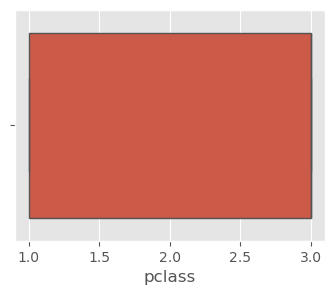


Mean of 'sex_binary' is: 0.37420178799489145
Median of 'sex_binary' is: 0.0
mean > median: True
Positive Skewness



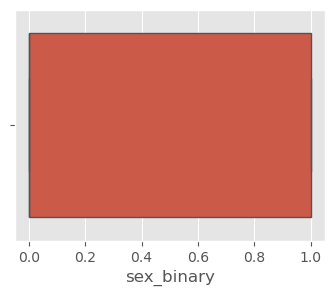


Mean of 'age' is: 29.80538952745849
Median of 'age' is: 29.7
mean < median: False
Negtive Skewness



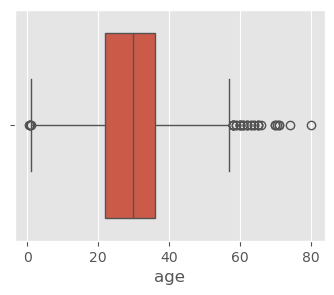


Mean of 'sibsp' is: 0.5236270753512133
Median of 'sibsp' is: 0.0
mean > median: True
Positive Skewness



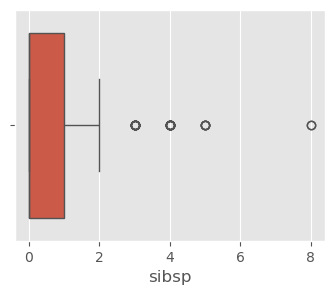


Mean of 'parch' is: 0.4163473818646232
Median of 'parch' is: 0.0
mean > median: True
Positive Skewness



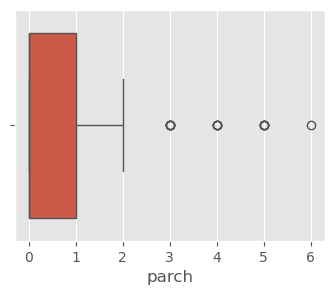


Mean of 'fare' is: 34.72216334610473
Median of 'fare' is: 15.9
mean > median: True
Positive Skewness



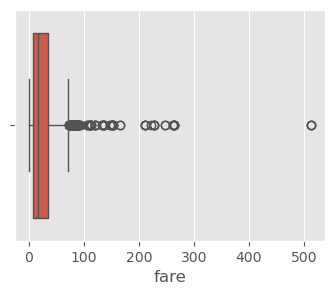


Mean of 'who_label' is: 0.5300127713920817
Median of 'who_label' is: 0.0
mean > median: True
Positive Skewness



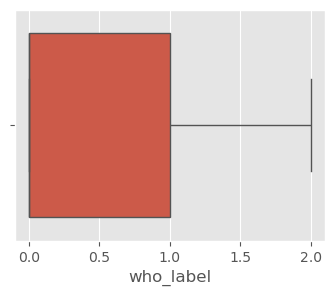


Mean of 'adult_male_numeric' is: 0.39816091954022986
Median of 'adult_male_numeric' is: 0.16
mean > median: True
Positive Skewness



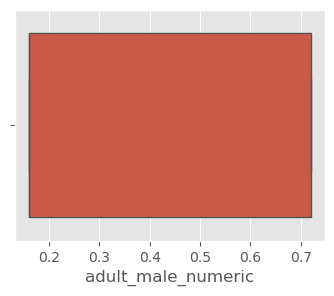


Mean of 'deck_ordinal' is: 3.0970625798212006
Median of 'deck_ordinal' is: 3.0
mean == median: False
Normal Distribution



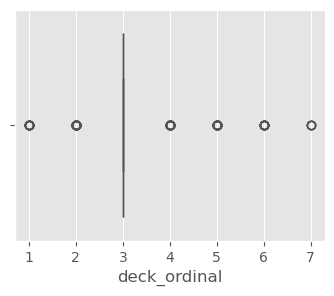


Mean of 'embark_town_label' is: 0.3486590038314176
Median of 'embark_town_label' is: 0.0
mean > median: True
Positive Skewness



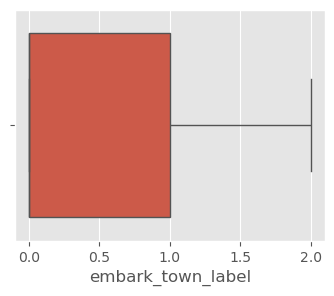


Mean of 'alone_binary' is: 0.5683269476372924
Median of 'alone_binary' is: 1.0
mean < median: True
Negtive Skewness



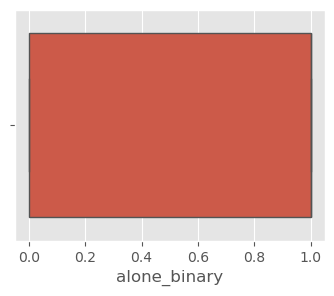

In [66]:
# Calling find_skewness function for each feature
for feature in df_numeric_features:
    find_skewness_boxplot(dataframe=df_numeric_features, feature_name=feature)

**Here we can see:**
- Outliers can be seen for these features:
  * age
  * sibsp
  * parch
  * fare
  * deck_ordinal
- For these features, the interquartile range is equal to the entire data range:
  * pclass
  * sex_binary
  * adult_male_numeric
  * alone_binary
- Except the following features, the **rest** of features have positive skewness:
  * pclass
  * age
  * deck_ordinal (No skewness)
  * alone_binary

## Are Data Balanced?

In [67]:
# Is data balanced?
data_balance_checking = df_sans_duplicates.value_counts(subset=["living_status"])

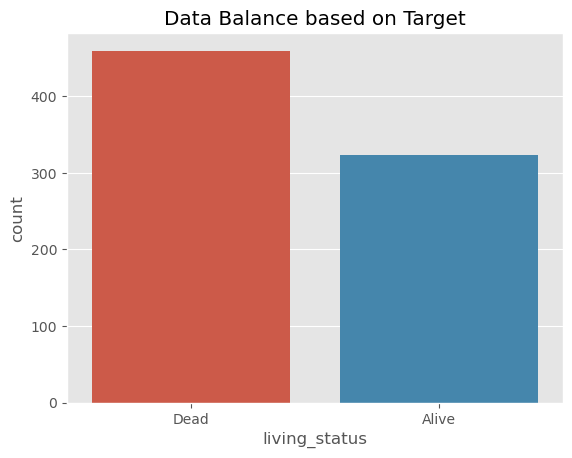

In [68]:
# Data balance count plot
sns.countplot(data=df_sans_duplicates, x='living_status', hue="living_status")
plt.title("Data Balance based on Target")
plt.show()

**Insight:**
- Data count is not balanced

## Relation Between Features

### Using scatterplot

In [69]:
# Choosing features for scatterplot
df_sans_duplicates.sample(5)

,pclass,sex_binary,age,sibsp,parch,fare,who_label,adult_male_numeric,deck_ordinal,embark_town_label,alone_binary,survived,living_status
845,3,0,42.0,0,0,7.550,0,0.16,3,0.0,1,0,Dead
129,3,0,45.0,0,0,6.975,0,0.16,3,0.0,1,0,Dead
735,3,0,28.5,0,0,16.100,0,0.16,3,0.0,1,0,Dead
763,1,1,36.0,1,2,120.000,1,0.72,2,0.0,0,1,Alive
456,1,0,65.0,0,0,26.550,0,0.16,5,0.0,1,0,Dead


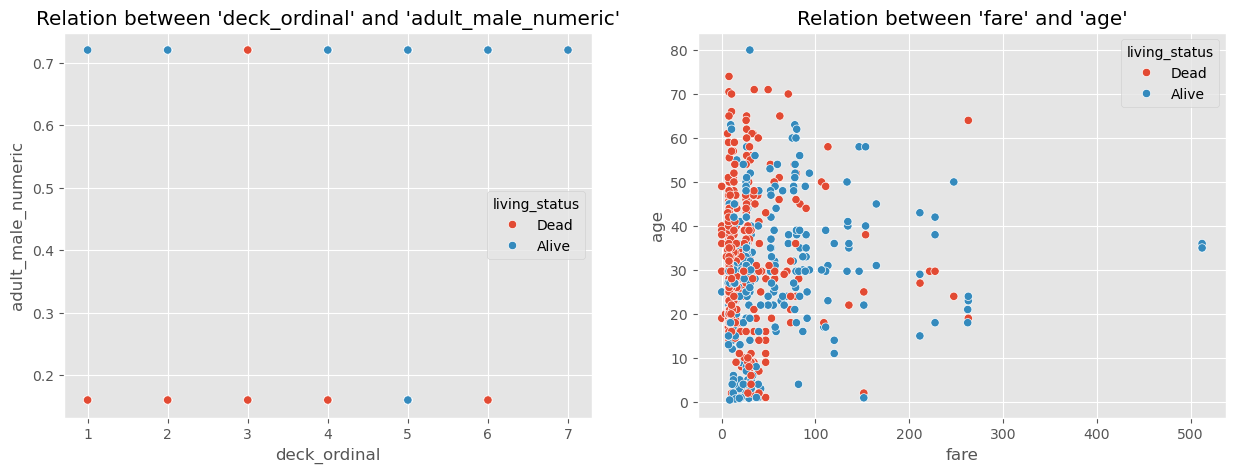

In [70]:
plt.figure(figsize=[15, 5])

# Relation between 'deck_ordinal' and 'adult_male_numeric'
plt.subplot(121)
sns.scatterplot(data=df_sans_duplicates,
                x="deck_ordinal",
                y="adult_male_numeric",
                hue="living_status")
plt.title("Relation between 'deck_ordinal' and 'adult_male_numeric'")

# Relation between 'fare' and 'age'
plt.subplot(122)
sns.scatterplot(data=df_sans_duplicates,
               x="fare",
               y="age",
               hue="living_status")
plt.title("Relation between 'fare' and 'age'")
plt.show()

**Insight:**
- As the data for both '' and '' are only made of few unique values, the relation graph is made of overlapped dots.
- 'fare' and 'age' data are linearly dependent.
- for 'fare' and 'age', outliers can be seen.

### Using Pairplot

In [71]:
# Choosing features for pairplot
df_sans_duplicates.head()

,pclass,sex_binary,age,sibsp,parch,fare,who_label,adult_male_numeric,deck_ordinal,embark_town_label,alone_binary,survived,living_status
0,3,0,22.0,1,0,7.2500,0,0.16,3,0.0,0,0,Dead
1,1,1,38.0,1,0,71.2833,1,0.72,3,1.0,0,1,Alive
2,3,1,26.0,0,0,7.9250,1,0.72,3,0.0,1,1,Alive
3,1,1,35.0,1,0,53.1000,1,0.72,3,0.0,0,1,Alive
4,3,0,35.0,0,0,8.0500,0,0.16,3,0.0,1,0,Dead


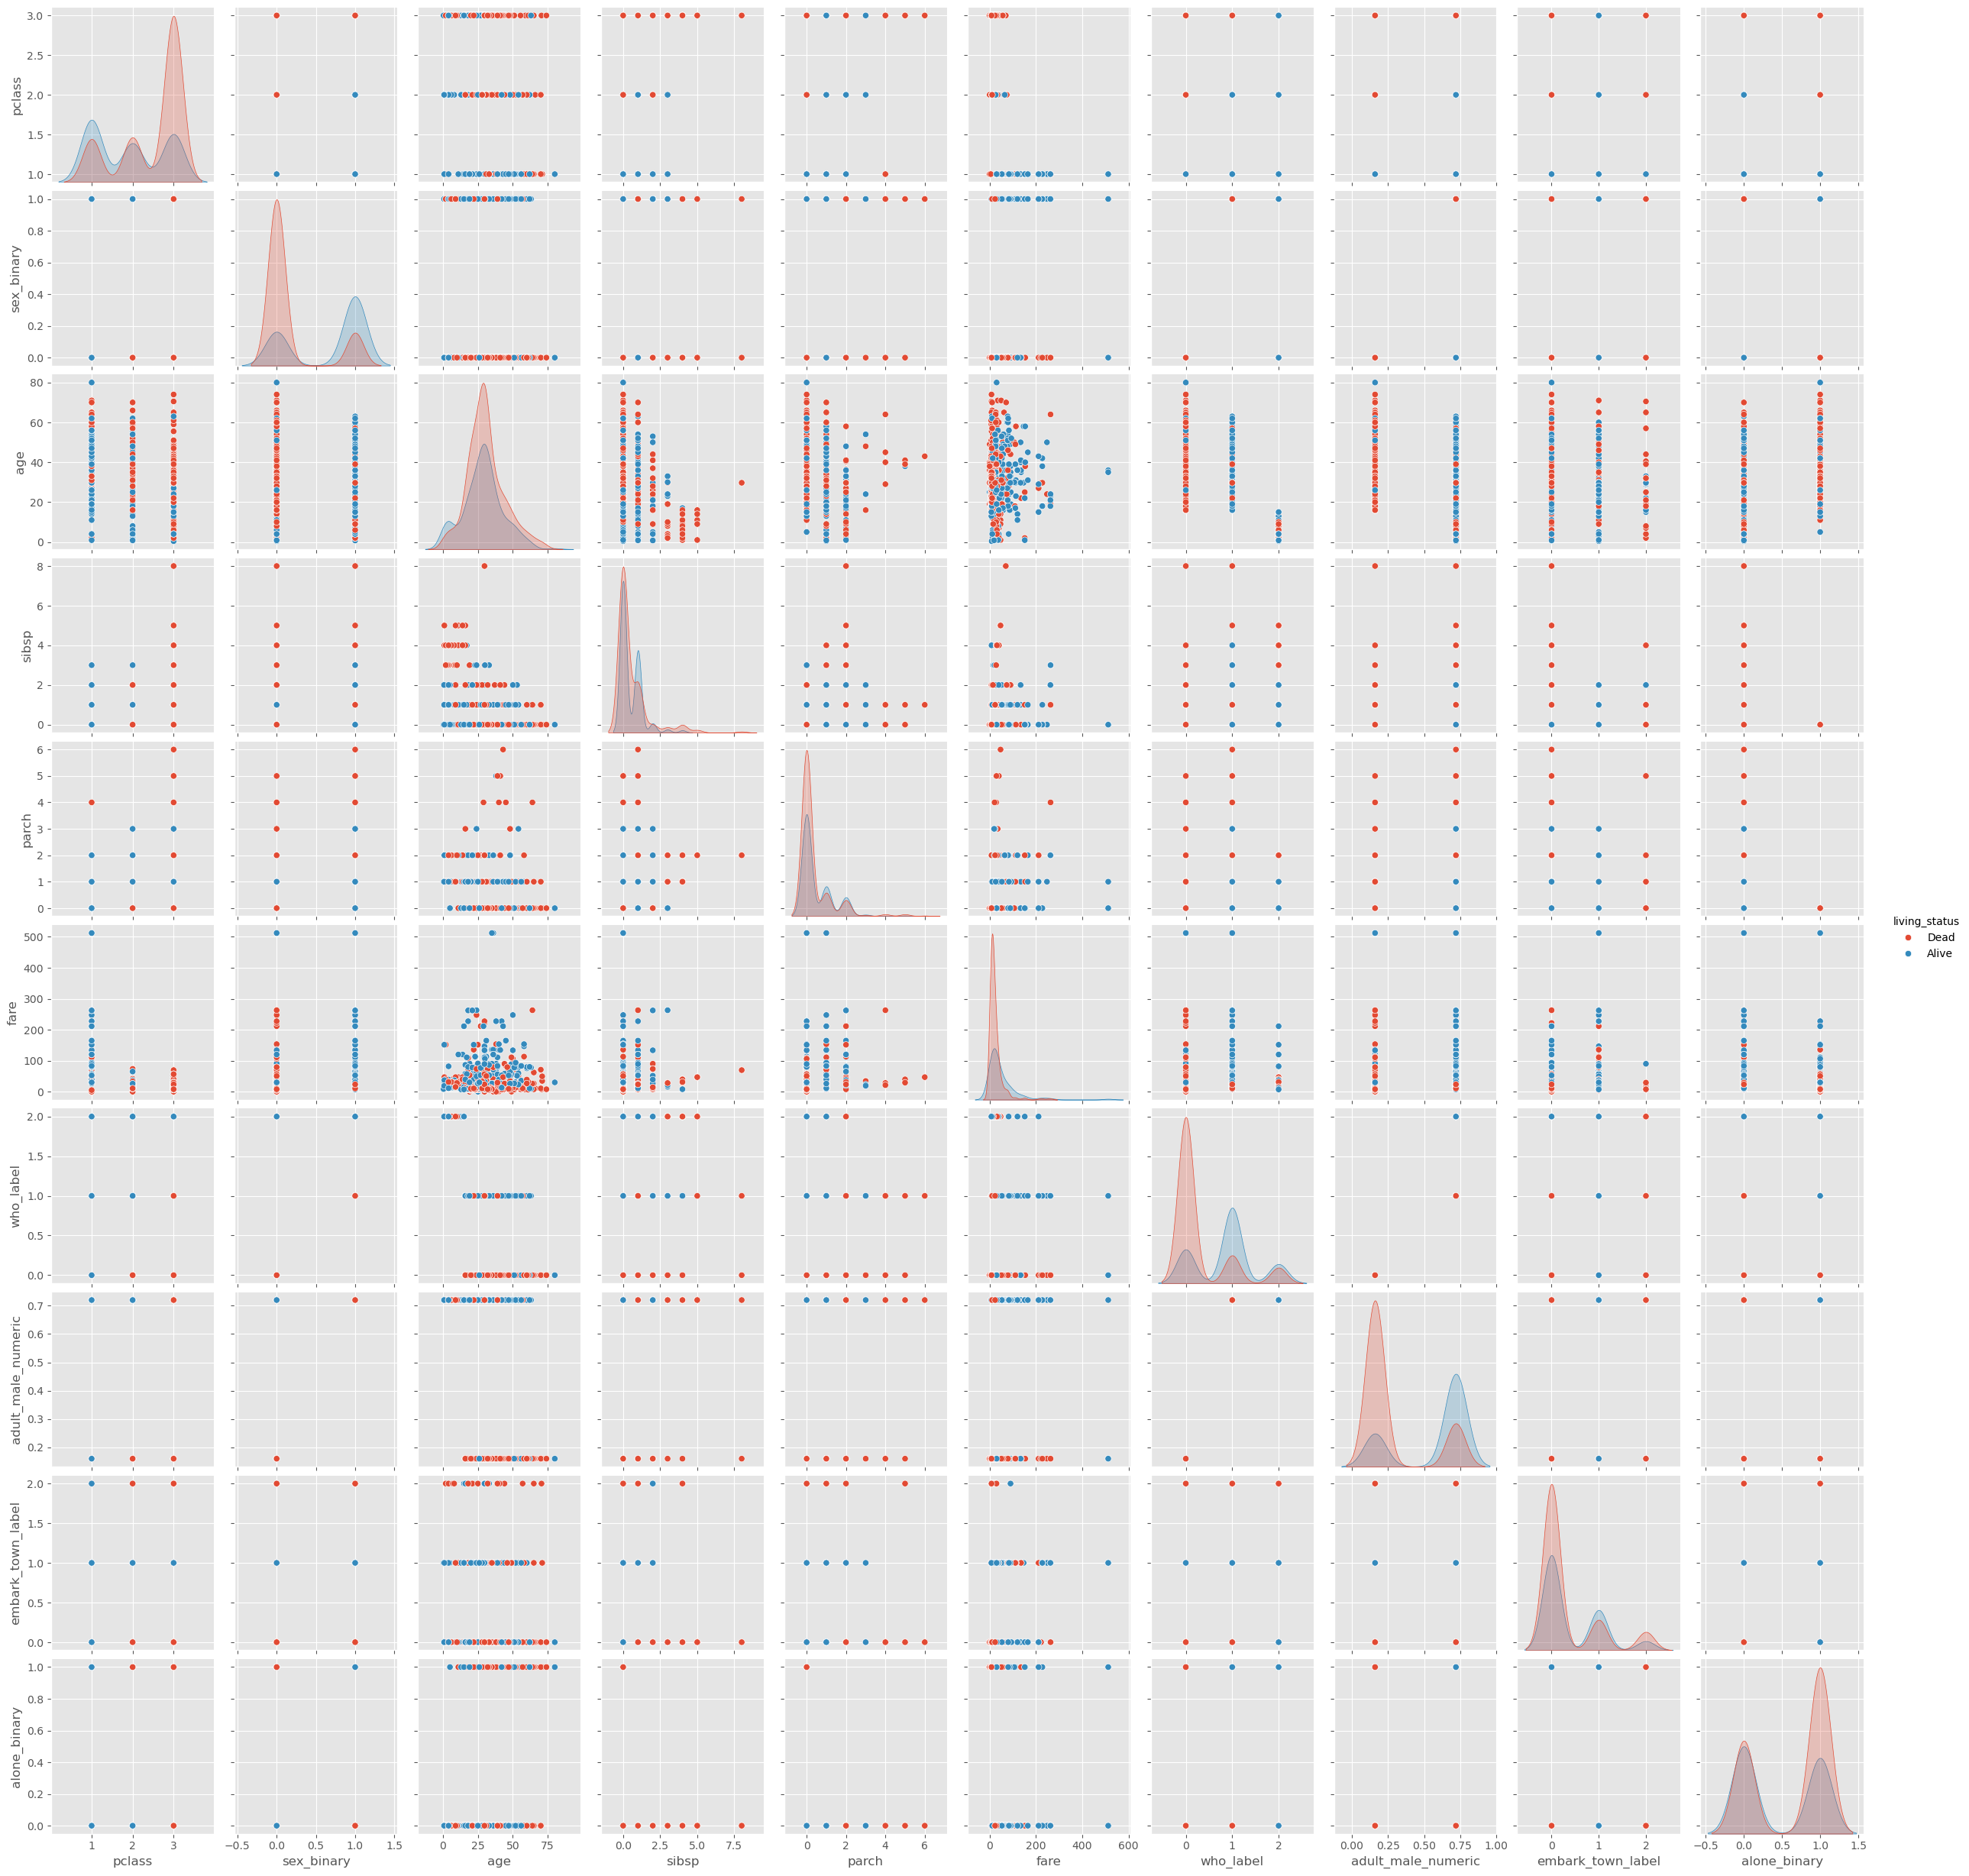

In [72]:
# Drawing pairplot
sns.pairplot(data=df_sans_duplicates.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12]],
             hue="living_status")
plt.show()

**Insight:**
- As the data are mostly discrete, relation between features is not clear due to data overlapping.
- Only 'fare' and 'age' features have some relation which is linearly dependent.
- For 'age' feature normal distribution with no skewness can be seen.
- For These features, we can not see normal distribution:
  * 'pclass' for 'Alive' living status,
  * 'who_label' for 'Alive' living status,
  * 'alone_binary' for 'Alive' living status.
- For the following features positive skewness can be observed:
  * 'sex_binary' for 'Dead' living status,
  * 'sibsp' for 'Dead' and 'Alive' living status,
  * 'perch' for 'Dead' and 'Alive' living status,
  * 'fare' for 'Dead' and 'Alive' living status,
  * 'who_label' for 'Dead' living status,
  * 'adult_male_numeric' for 'Dead' living status,
  * 'embark_town_label' for 'Dead' and 'Alive' living status.
- For the following features negative skewness can be observed:
  * 'pclass' for 'Dead' living status,
  * 'sex_binary' for 'Alive' living status,
  * 'adult_male_numeric' for 'Alive' living status,
  * 'alone_binary' for 'Dead' living status.

### Parallel Coordinates

In [73]:
# Choosing feartures for parallel coordinates
df_sans_duplicates.head()

,pclass,sex_binary,age,sibsp,parch,fare,who_label,adult_male_numeric,deck_ordinal,embark_town_label,alone_binary,survived,living_status
0,3,0,22.0,1,0,7.2500,0,0.16,3,0.0,0,0,Dead
1,1,1,38.0,1,0,71.2833,1,0.72,3,1.0,0,1,Alive
2,3,1,26.0,0,0,7.9250,1,0.72,3,0.0,1,1,Alive
3,1,1,35.0,1,0,53.1000,1,0.72,3,0.0,0,1,Alive
4,3,0,35.0,0,0,8.0500,0,0.16,3,0.0,1,0,Dead


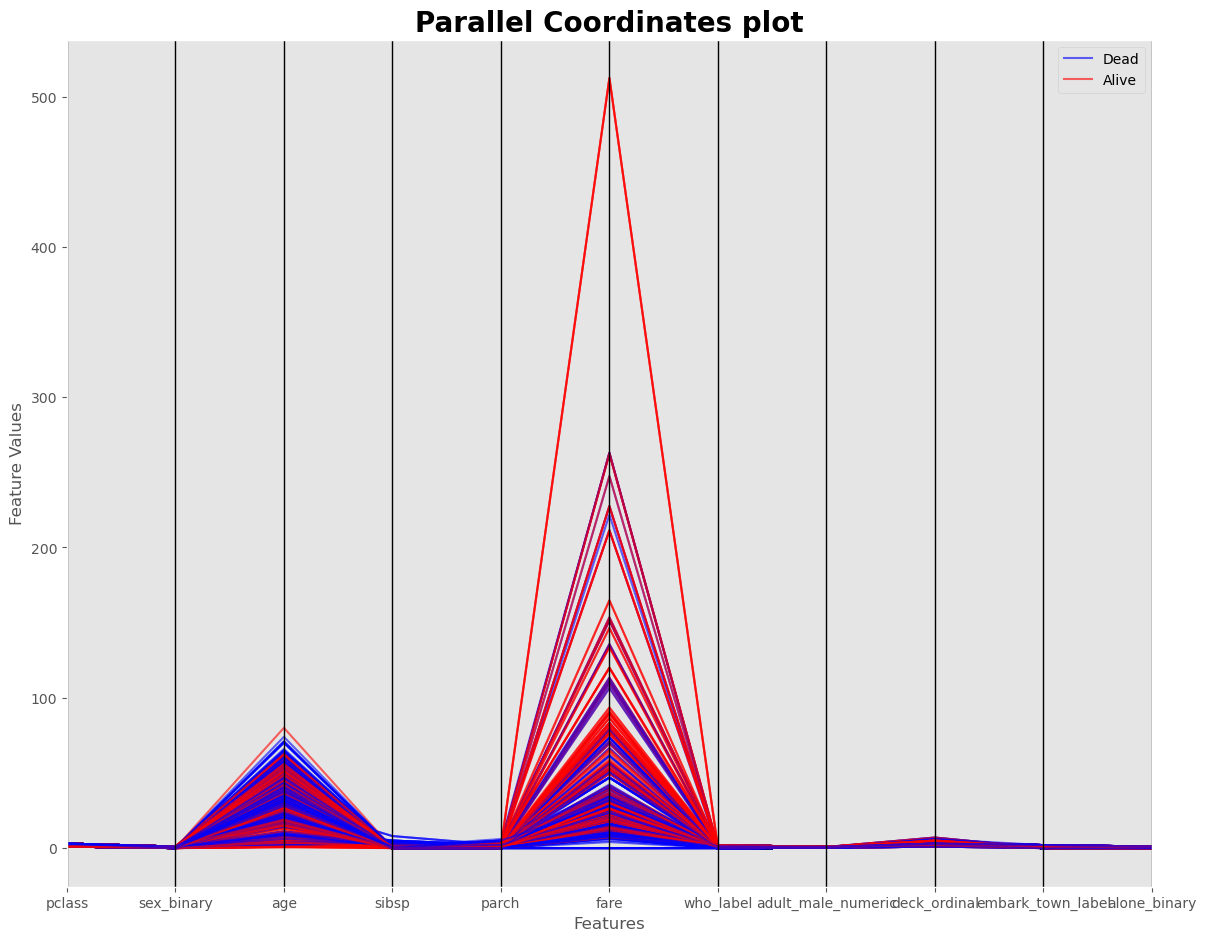

In [82]:
# Drawing parallel coordinates plot
plt.figure(figsize=(14, 11))
pd.plotting.parallel_coordinates(
    frame=df_sans_duplicates,
    class_column="living_status",
    cols=df_sans_duplicates.columns[:11],
    color=["blue", "red"],
    alpha=0.6
)
plt.title("Parallel Coordinates plot", fontsize=20, fontweight="bold")
plt.xlabel("Features")
plt.ylabel("Feature Values")
plt.show()

**Here we can see:**
- Wide range can be observed for 'fare' and 'age' data.
- for 'fare' feature, outlier can be seen.
- for 'fare' and 'age', linear dependency is clear.
- Data need to get scaled.
- Data Overlapping made it hard to have a clear plot.

## Correlation Between Features

In [90]:
# Correlation matrix
corr_mat = (df_sans_duplicates
    .corr(numeric_only=True)
    .style
    .background_gradient(cmap="coolwarm")
    .format(precision=2)
)
corr_mat

,pclass,sex_binary,age,sibsp,parch,fare,who_label,adult_male_numeric,embark_town_label,alone_binary,survived
pclass,1.00,-0.12,-0.34,0.09,0.04,-0.55,0.02,-0.07,0.02,0.11,-0.33
sex_binary,-0.12,1.00,-0.09,0.10,0.24,0.17,0.70,0.90,0.09,-0.28,0.52
age,-0.34,-0.09,1.00,-0.28,-0.19,0.09,-0.46,-0.27,0.01,0.19,-0.08
sibsp,0.09,0.10,-0.28,1.00,0.38,0.14,0.39,0.27,-0.04,-0.61,-0.04
parch,0.04,0.24,-0.19,0.38,1.00,0.19,0.41,0.35,-0.07,-0.57,0.07
fare,-0.55,0.17,0.09,0.14,0.19,1.00,0.12,0.17,0.08,-0.25,0.25
who_label,0.02,0.70,-0.46,0.39,0.41,0.12,1.00,0.91,0.06,-0.44,0.44
adult_male_numeric,-0.07,0.90,-0.27,0.27,0.35,0.17,0.91,1.00,0.08,-0.39,0.53
embark_town_label,0.02,0.09,0.01,-0.04,-0.07,0.08,0.06,0.08,1.00,0.01,0.07
alone_binary,0.11,-0.28,0.19,-0.61,-0.57,-0.25,-0.44,-0.39,0.01,1.00,-0.18


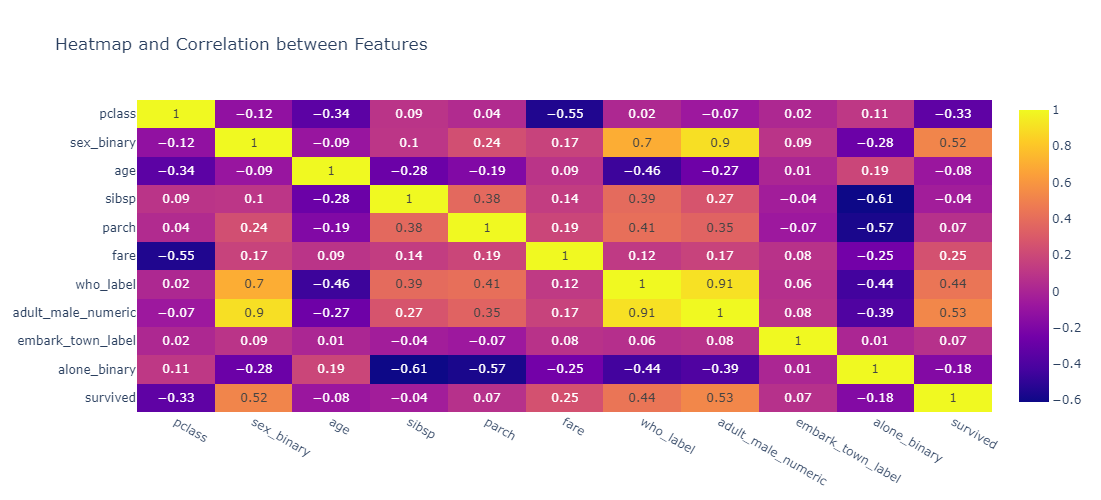

In [96]:
# Correlation heatmap using plotly imshow
fig = px.imshow(img=df_sans_duplicates.corr(numeric_only=True).round(2),
                text_auto=True,
                title="Heatmap and Correlation between Features",
                aspect="auto",
                height=500
                )
fig.show()

**Insight:**
- These features have strong positive correllation:
  * 'adult_male_numeric' and 'who_label',
  * 'adult_male_numeric' and 'sex_binary',
  * 'who_label' and 'sex_binary'.
- These features have mild negative correllation:
  * 'alone_binary' and 'sibsp',
  * 'alone_binary' and 'parch',
  *  'who_label' and 'age'.

## Outliers Detection

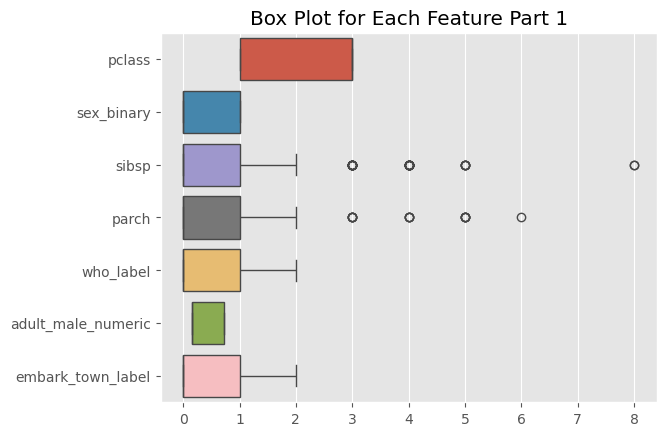

In [110]:
# Box plots for each feature as a general view part 1
plt.title("Box Plot for Each Feature Part 1")
sns.boxplot(data=df_sans_duplicates.iloc[:, [0, 1, 3, 4, 6, 7, 8, 9]], orient="h")
plt.show()

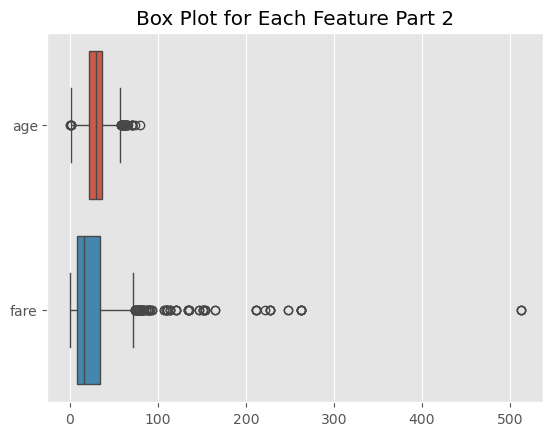

In [109]:
# Box plots for each feature as a general view part 2
plt.title("Box Plot for Each Feature Part 2")
sns.boxplot(data=df_sans_duplicates.iloc[:, [2, 5]], orient="h")
plt.show()

In [119]:
# Box and whisker plot function
def box_and_whisker_plot(dataframe, feature_name: str, target: str) -> None:
    '''
    Drawing box and whisker plot for a specific feature and based on target values.
    '''
    plt.figure(figsize=(8, 5))
    plt.title(f"Box and Whisker Plot for '{feature_name}' based on '{target}'")
    sns.boxplot(data=dataframe,
                x=feature_name,
                y=target, hue=target,
                medianprops={"linewidth":2, "linestyle":"dashed"})
    plt.show()

In [114]:
# Turning feature values into zscore values
from scipy import stats
zscores = [stats.zscore(df_numeric_features[feature]) for feature in df_numeric_features.columns]
len(zscores), type(zscores)

(11, list)

In [116]:
df_numeric_features.columns.tolist()

['pclass',
 'sex_binary',
 'age',
 'sibsp',
 'parch',
 'fare',
 'who_label',
 'adult_male_numeric',
 'deck_ordinal',
 'embark_town_label',
 'alone_binary']

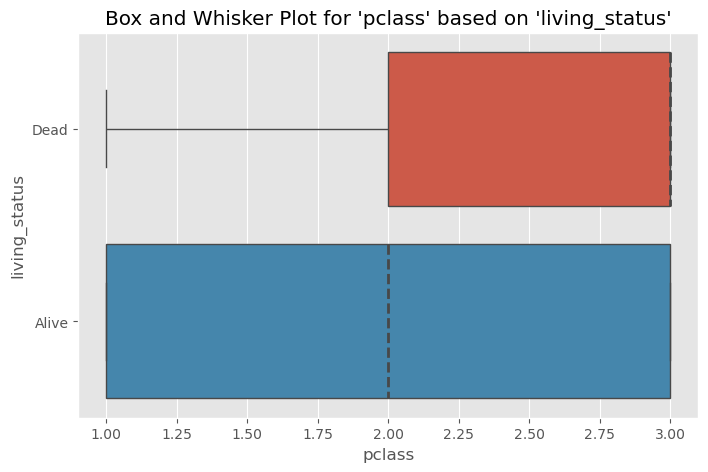

In [120]:
# Box and whisker plot function for 'pclass' based on living status
zscore_pclass = zscores[0]
box_and_whisker_plot(df_sans_duplicates, "pclass", "living_status")

In [122]:
# Outliers using box plot and zscore for 'sepal_length'
outlier_pclass = df_sans_duplicates[np.abs(zscore_pclass) > 3]
outlier_pclass

,pclass,sex_binary,age,sibsp,parch,fare,who_label,adult_male_numeric,deck_ordinal,embark_town_label,alone_binary,survived,living_status


In [47]:
# Box and whisker plot function for 'sepal_width' based on species


In [48]:
# Outliers using box plot and zscore for 'sepal_width'


In [49]:
# Box and whisker plot function for 'petal_length' based on species


In [50]:
# Outliers using box plot and zscore for 'petal_length'


In [51]:
# Box and whisker plot function for 'petal_width' based on species


In [52]:
# Outliers using box plot and zscore for 'petal_width'


In [53]:
# Collection of outliers using box plot and zscore


**Insight:**
- 

In [55]:
# Outlier indices function using 3*sigma based on normal distribution


### Driver Code ###


In [56]:
# Outlier indices function using iqr


### Driver Code ###


In [57]:
# Turning outlier list into set and obtaining intersection of two sets


In [58]:
# Dropping outliers


## Feature Scalling

In [59]:
# Investigating feature ranges for checking of feature scalling


**Note:**



## Distribution Plot

In [60]:
# Drawing distribution plot


**Insight**
